In [48]:
import flask
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KDTree
from readcalc import readcalc
from textblob import TextBlob
import os

In [85]:
df = pd.read_csv("../prediction_app/static/merged_data.csv")
completed_df = df[df.RESP == 1]
essay_df = df[['_projectid', ' essay']]

In [86]:
completed_df

,_projectid,school_previous_projects,teacher_previous_projects,month,log_price_including,sqrt_students_reached,price_per_student,total_state_donors,total_state_projects,state_avg_donors,...,school_metro_suburban,school_metro_urban,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,RESP,essay
0,02c7bc35161ba1b988e1c04c115c0a6f,22,1,1,5.270381,2.236068,38.898000,334846,85457,3.918298,...,0,1,0,0,1,0,0,0,1,I have some amazingly talented students who ar...
1,0899b88e9c28d26793af47e3c06cf26e,55,4,1,6.410619,5.567764,19.621613,96404,19262,5.004880,...,0,1,0,1,0,0,0,0,1,"""It's like sitting on ice!"" was what one of my..."
3,0c317340d757b09c7a56390cb1b5602e,373,4,1,5.843573,4.690416,15.682273,334846,85457,3.918298,...,0,1,0,0,1,0,0,0,1,"For our students to reach their goals, we need..."
7,1200b446a6ccc476247fce13a64dec96,14,4,1,5.696120,4.242641,16.539444,99405,17909,5.550561,...,0,1,0,0,0,1,0,0,1,These days students are technology driven so w...
8,0e70042b002fcd2b31a64b314b633335,24,5,1,5.197391,4.795832,7.860870,69536,15652,4.442627,...,0,0,0,0,1,0,0,0,1,"Have you ever had to sit on the cold, hard flo..."
9,139bfccb0b2544e763eeef343d0f21e5,1,0,1,6.466875,4.795832,27.976957,24909,7869,3.165459,...,1,0,0,0,0,1,0,0,1,My students begin and end their day with famil...
10,130dc4e7a295e3b4bdd489cdf9c0ea23,106,1,1,6.201442,4.690416,22.430000,800185,157654,5.075577,...,1,0,0,0,1,0,0,0,1,Do you remember the first time you were asked ...
11,13d5003132fce51c9060568338e4eb92,21,2,1,5.976173,5.567764,12.707419,334846,85457,3.918298,...,0,1,0,0,0,1,0,0,1,Students work best when they are working in an...
12,139b4c7eab05f1afa5468359679328b5,29,14,1,5.965069,4.358899,20.504211,334846,85457,3.918298,...,0,1,0,0,1,0,0,0,1,Do you remember how much you liked art when yo...
14,1ab572297b7d093431d7e0bba1ea9f27,42,9,1,6.010752,11.000000,3.370165,28333,8000,3.541625,...,0,0,0,0,0,1,0,0,1,Graphing calculators are a basic and essential...


In [87]:
completed_df['features_together'] = zip(completed_df['primary_focus_subject_Applied Sciences'],
completed_df['primary_focus_subject_Character Education'],
completed_df['primary_focus_subject_Civics & Government'],
completed_df['primary_focus_subject_College & Career Prep'],
completed_df['primary_focus_subject_Community Service'],
completed_df['primary_focus_subject_ESL'],
completed_df['primary_focus_subject_Early Development'],
completed_df['primary_focus_subject_Economics'],
completed_df['primary_focus_subject_Environmental Science'],
completed_df['primary_focus_subject_Extracurricular'],
completed_df['primary_focus_subject_Financial Literacy'],
completed_df['primary_focus_subject_Foreign Languages'],
completed_df['primary_focus_subject_Gym & Fitness'],
completed_df['primary_focus_subject_Health & Life Science'],
completed_df['primary_focus_subject_Health & Wellness'],
completed_df['primary_focus_subject_History & Geography'],
completed_df['primary_focus_subject_Literacy'],
completed_df['primary_focus_subject_Literature & Writing'],
completed_df['primary_focus_subject_Mathematics'],
completed_df['primary_focus_subject_Music'],
completed_df['primary_focus_subject_Nutrition'],
completed_df['primary_focus_subject_Other'],
completed_df['primary_focus_subject_Parent Involvement'],
completed_df['primary_focus_subject_Performing Arts'],
completed_df['primary_focus_subject_Social Sciences'],
completed_df['primary_focus_subject_Special Needs'],
completed_df['primary_focus_subject_Team Sports'],
completed_df['primary_focus_subject_Visual Arts'],
completed_df['grade_level_Grades 3-5'],
completed_df['grade_level_Grades 6-8'],
completed_df['grade_level_Grades 9-12'],
completed_df['grade_level_Grades PreK-2'],
completed_df['resource_type_Books'],
completed_df['resource_type_Other'],
completed_df['resource_type_Supplies'],
completed_df['resource_type_Technology'],
completed_df['resource_type_Trips'],
completed_df['resource_type_Visitors'])

In [88]:
completed_df

,_projectid,school_previous_projects,teacher_previous_projects,month,log_price_including,sqrt_students_reached,price_per_student,total_state_donors,total_state_projects,state_avg_donors,...,school_metro_urban,resource_type_Books,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,RESP,essay,features_together
0,02c7bc35161ba1b988e1c04c115c0a6f,22,1,1,5.270381,2.236068,38.898000,334846,85457,3.918298,...,1,0,0,1,0,0,0,1,I have some amazingly talented students who ar...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0899b88e9c28d26793af47e3c06cf26e,55,4,1,6.410619,5.567764,19.621613,96404,19262,5.004880,...,1,0,1,0,0,0,0,1,"""It's like sitting on ice!"" was what one of my...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,0c317340d757b09c7a56390cb1b5602e,373,4,1,5.843573,4.690416,15.682273,334846,85457,3.918298,...,1,0,0,1,0,0,0,1,"For our students to reach their goals, we need...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,1200b446a6ccc476247fce13a64dec96,14,4,1,5.696120,4.242641,16.539444,99405,17909,5.550561,...,1,0,0,0,1,0,0,1,These days students are technology driven so w...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,0e70042b002fcd2b31a64b314b633335,24,5,1,5.197391,4.795832,7.860870,69536,15652,4.442627,...,0,0,0,1,0,0,0,1,"Have you ever had to sit on the cold, hard flo...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,139bfccb0b2544e763eeef343d0f21e5,1,0,1,6.466875,4.795832,27.976957,24909,7869,3.165459,...,0,0,0,0,1,0,0,1,My students begin and end their day with famil...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10,130dc4e7a295e3b4bdd489cdf9c0ea23,106,1,1,6.201442,4.690416,22.430000,800185,157654,5.075577,...,0,0,0,1,0,0,0,1,Do you remember the first time you were asked ...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
11,13d5003132fce51c9060568338e4eb92,21,2,1,5.976173,5.567764,12.707419,334846,85457,3.918298,...,1,0,0,0,1,0,0,1,Students work best when they are working in an...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
12,139b4c7eab05f1afa5468359679328b5,29,14,1,5.965069,4.358899,20.504211,334846,85457,3.918298,...,1,0,0,1,0,0,0,1,Do you remember how much you liked art when yo...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
14,1ab572297b7d093431d7e0bba1ea9f27,42,9,1,6.010752,11.000000,3.370165,28333,8000,3.541625,...,0,0,0,0,1,0,0,1,Graphing calculators are a basic and essential...,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [89]:
test = completed_df.ix[0].values
test

array(['02c7bc35161ba1b988e1c04c115c0a6f', 22, 1, 1, 5.27038074786,
       2.2360679774999999, 38.898000000000003, 334846, 85457,
       3.9182980914400001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1,
       "I have some amazingly talented students who are interested in going on to art high schools. I'd like them to be able to submit various types of work in their entry portfolios. \n\n\n\nMy students are very creative. Our school is best described as inner city and tough! My kids' hearts are in the arts, and they are talented enough to pursue this dream. Unfortunately, because of their circumstances, none of them have the necessary supplies to create the projects to make this happen. \n\n\n\nThese supplies will go to 8th graders who intend to make art their quest in specialized high 

In [98]:
a = test[10:38]
b = test[42:46]
c = test[49:55]
short_x = np.concatenate((a,b,c))
short_x = tuple(short_x)
print short_x

(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0)


In [90]:
print len(completed_df['features_together'][0])
print type(completed_df['features_together'][0])

38
<type 'tuple'>


In [95]:
completed_df.features_together

0         (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1         (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3         (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
7         (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
8         (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9         (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
11        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
12        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
14        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
15        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
16        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
17        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
18        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
19        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
21        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
22        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [100]:
ind = pd.DataFrame(completed_df[' essay'].loc[completed_df['features_together'] == short_x])
ind

,essay
0,I have some amazingly talented students who ar...
64,Every day in my art classroom is a new adventu...
257,My students come from different areas of the B...
643,"Before taking my class, many of my middle scho..."
737,My students have been wanting to paint despera...
1908,"""Alright, it is time to begin our first waterc..."
2228,My classroom is in a low income area where mat...
2891,My students are very creative. They love usin...
3262,"The day begins with our ""Hello, ready to learn..."
3447,Art has the power to move and connect you with...


In [ ]:
merged['features_together'] = zip(merged['primary_focus_subject_Applied Sciences'],
merged['primary_focus_subject_Character Education'],
merged['primary_focus_subject_Civics & Government'],
merged['primary_focus_subject_College & Career Prep'],
merged['primary_focus_subject_Community Service'],
merged['primary_focus_subject_ESL'],
merged['primary_focus_subject_Early Development'],
merged['primary_focus_subject_Economics'],
merged['primary_focus_subject_Environmental Science'],
merged['primary_focus_subject_Extracurricular'],
merged['primary_focus_subject_Financial Literacy'],
merged['primary_focus_subject_Foreign Languages'],
merged['primary_focus_subject_Gym & Fitness'],
merged['primary_focus_subject_Health & Life Science'],
merged['primary_focus_subject_Health & Wellness'],
merged['primary_focus_subject_History & Geography'],
merged['primary_focus_subject_Literacy'],
merged['primary_focus_subject_Literature & Writing'],
merged['primary_focus_subject_Mathematics'],
merged['primary_focus_subject_Music'],
merged['primary_focus_subject_Nutrition'],
merged['primary_focus_subject_Other'],
merged['primary_focus_subject_Parent Involvement'],
merged['primary_focus_subject_Performing Arts'],
merged['primary_focus_subject_Social Sciences'],
merged['primary_focus_subject_Special Needs'],
merged['primary_focus_subject_Team Sports'],
merged['primary_focus_subject_Visual Arts'],
merged['grade_level_Grades 3-5'],
merged['grade_level_Grades 6-8'],
merged['grade_level_Grades 9-12'],
merged['grade_level_Grades PreK-2'],
merged['resource_type_Books'],
merged['resource_type_Other'],
merged['resource_type_Supplies'],
merged['resource_type_Technology'],
merged['resource_type_Trips'],
merged['resource_type_Visitors']

In [101]:
df = pd.DataFrame(pickle.load(open('../data_files/polar_score.pkl', 'rb')))
df

,_projectid,RESP,essay,new_essay,polar,subjectivity
0,02c7bc35161ba1b988e1c04c115c0a6f,1,I have some amazingly talented students who ar...,I have some amazingly talented students who ar...,0.233901,0.638261
1,0899b88e9c28d26793af47e3c06cf26e,1,"""It's like sitting on ice!"" was what one of my...","""It's like sitting on ice!"" was what one of my...",0.041390,0.521482
2,038fbbffb42416d0ca8ff46dff7ce743,0,There is a link between motivation and academi...,There is a link between motivation and academi...,0.130000,0.417500
3,0c317340d757b09c7a56390cb1b5602e,1,"For our students to reach their goals, we need...","For our students to reach their goals, we need...",0.154199,0.537132
4,0a89a92fadb414ac19172e889d78fe21,0,Reading is the center of my third grade classr...,Reading is the center of my third grade classr...,0.214961,0.408433
5,10a706016480821e13ee4673f642da3f,0,"""No one reads books to me at home"" and ""Read o...","""No one reads books to me at home"" and ""Read o...",0.224483,0.419976
6,0b3cb9e29158ca9c6f4302ae643f80ed,0,My students and I love Batman and he is always...,My students and I love Batman and he is always...,0.252139,0.478209
7,1200b446a6ccc476247fce13a64dec96,1,These days students are technology driven so w...,These days students are technology driven so w...,0.210335,0.465476
8,0e70042b002fcd2b31a64b314b633335,1,"Have you ever had to sit on the cold, hard flo...","Have you ever had to sit on the cold, hard flo...",0.069083,0.564330
9,139bfccb0b2544e763eeef343d0f21e5,1,My students begin and end their day with famil...,My students begin and end their day with famil...,0.234200,0.437677


In [102]:
df.groupby("RESP").mean()

,polar,subjectivity
RESP,,
0,0.209683,0.482832
1,0.211955,0.485270


In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

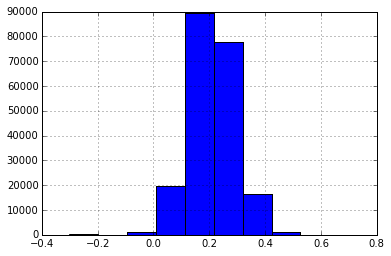

In [105]:
df.polar.hist()
plt.show()